# 引入必要的模块

In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
from gensim.models.word2vec import Word2Vec

2019-06-05 19:37:46,225 : INFO : 'pattern' package found; tag filters are available for English


# 加载已经训练好的模型
- <b>注意</b> 模型地址要用反斜杠“/”分割路径

In [13]:
# model = Word2Vec.load('teccl.model')
model = Word2Vec.load('bnc_lower.model')

2019-06-05 20:07:04,865 : INFO : loading Word2Vec object from bnc_lower.model
2019-06-05 20:07:04,866 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-05 20:07:05,241 : INFO : loading wv recursively from bnc_lower.model.wv.* with mmap=None
2019-06-05 20:07:05,242 : INFO : loading syn0 from bnc_lower.model.wv.syn0.npy with mmap=None
2019-06-05 20:07:05,278 : INFO : setting ignored attribute syn0norm to None
2019-06-05 20:07:05,278 : INFO : loading syn1neg from bnc_lower.model.syn1neg.npy with mmap=None
2019-06-05 20:07:05,312 : INFO : Model saved using code from earlier Gensim Version. Re-loading old model in a compatible way.
2019-06-05 20:07:05,313 : INFO : loading Word2Vec object from bnc_lower.model
2019-06-05 20:07:05,314 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-05 20:07:05,726 : INFO : loading wv recursively from bnc_lower.model.wv.* with mmap=None
2019-06-05 20:07:05,727 : INFO : loading syn0 from bnc_lower.model.wv.

# 词向量查询

## 相似词检索

In [14]:
model.wv.most_similar('beijing',topn=20)

2019-06-05 20:07:11,131 : INFO : precomputing L2-norms of word weight vectors


[('budapest', 0.8439075946807861),
 ('moscow', 0.833926796913147),
 ('tehran', 0.8233909606933594),
 ('peking', 0.8231561183929443),
 ('harare', 0.7944601774215698),
 ('bucharest', 0.7845585942268372),
 ('islamabad', 0.7812426090240479),
 ('tunis', 0.7806306481361389),
 ('seoul', 0.7791823148727417),
 ('nairobi', 0.7755261659622192),
 ('bangkok', 0.7751375436782837),
 ('washington', 0.774341344833374),
 ('bonn', 0.7743353843688965),
 ('belgrade', 0.7725775837898254),
 ('hanoi', 0.7709665298461914),
 ('stockholm', 0.7687994837760925),
 ('leipzig', 0.7634305357933044),
 ('pyongyang', 0.7519556283950806),
 ('jakarta', 0.7513130903244019),
 ('tirana', 0.7510769963264465)]

## 相似度计算

In [16]:
model.wv.similarity('woman','man')

0.889511

## 类比推理

In [15]:
model.wv.most_similar(positive = ['king','woman'], negative=['man'],topn=10)

[('queen', 0.8614708185195923),
 ('prince', 0.7710027694702148),
 ('emperor', 0.7509008646011353),
 ('empress', 0.7503201961517334),
 ('pope', 0.749457836151123),
 ('duke', 0.7162444591522217),
 ('princess', 0.7060992121696472),
 ('throne', 0.7047961354255676),
 ('countess', 0.6967053413391113),
 ('lij', 0.6810743808746338)]

# 可视化呈现

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
import numpy as np

In [50]:
def plot_with_labels(low_dim_embs, labels):        
    plt.figure(figsize=(60, 48))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y,c='r')
        fontsize = 50            
        bbox_props = dict(boxstyle="round,pad=0.3", fc="y", ec="0.5", lw=2,alpha=0.4)
        plt.annotate(label,  xy=(x, y),xytext=(5, 2), textcoords='offset points',fontsize=fontsize,
             ha='right', va='bottom',bbox=bbox_props)

def words2vectors(model,words):
    y = []
    X = []
    for w in words:
        if w not in model:
            print(w, ' is not in model, SKIPPED!')
            continue
        y.append(w)
        X.append(model[w])
    return X,y

def reduce_dim(X):
    tsne = TSNE(perplexity=50, n_components=2, learning_rate=50,init='pca', n_iter=5000)
    return tsne.fit_transform(np.array(X))

In [46]:
def visualize_words(model,words):
    X,y = words2vectors(model,words)
    X = reduce_dim(X)
    plot_with_labels(X,y)

- ** 输入要可视化的单词 **
- 以空格分开
- 小写(根据模型训练时的情况)

In [52]:
words = 'tianjing shanghai shenzhen guangzhou beijing tokyo shanghai london rome paris washington'
words = words.split()

tianjing  is not in model, SKIPPED!


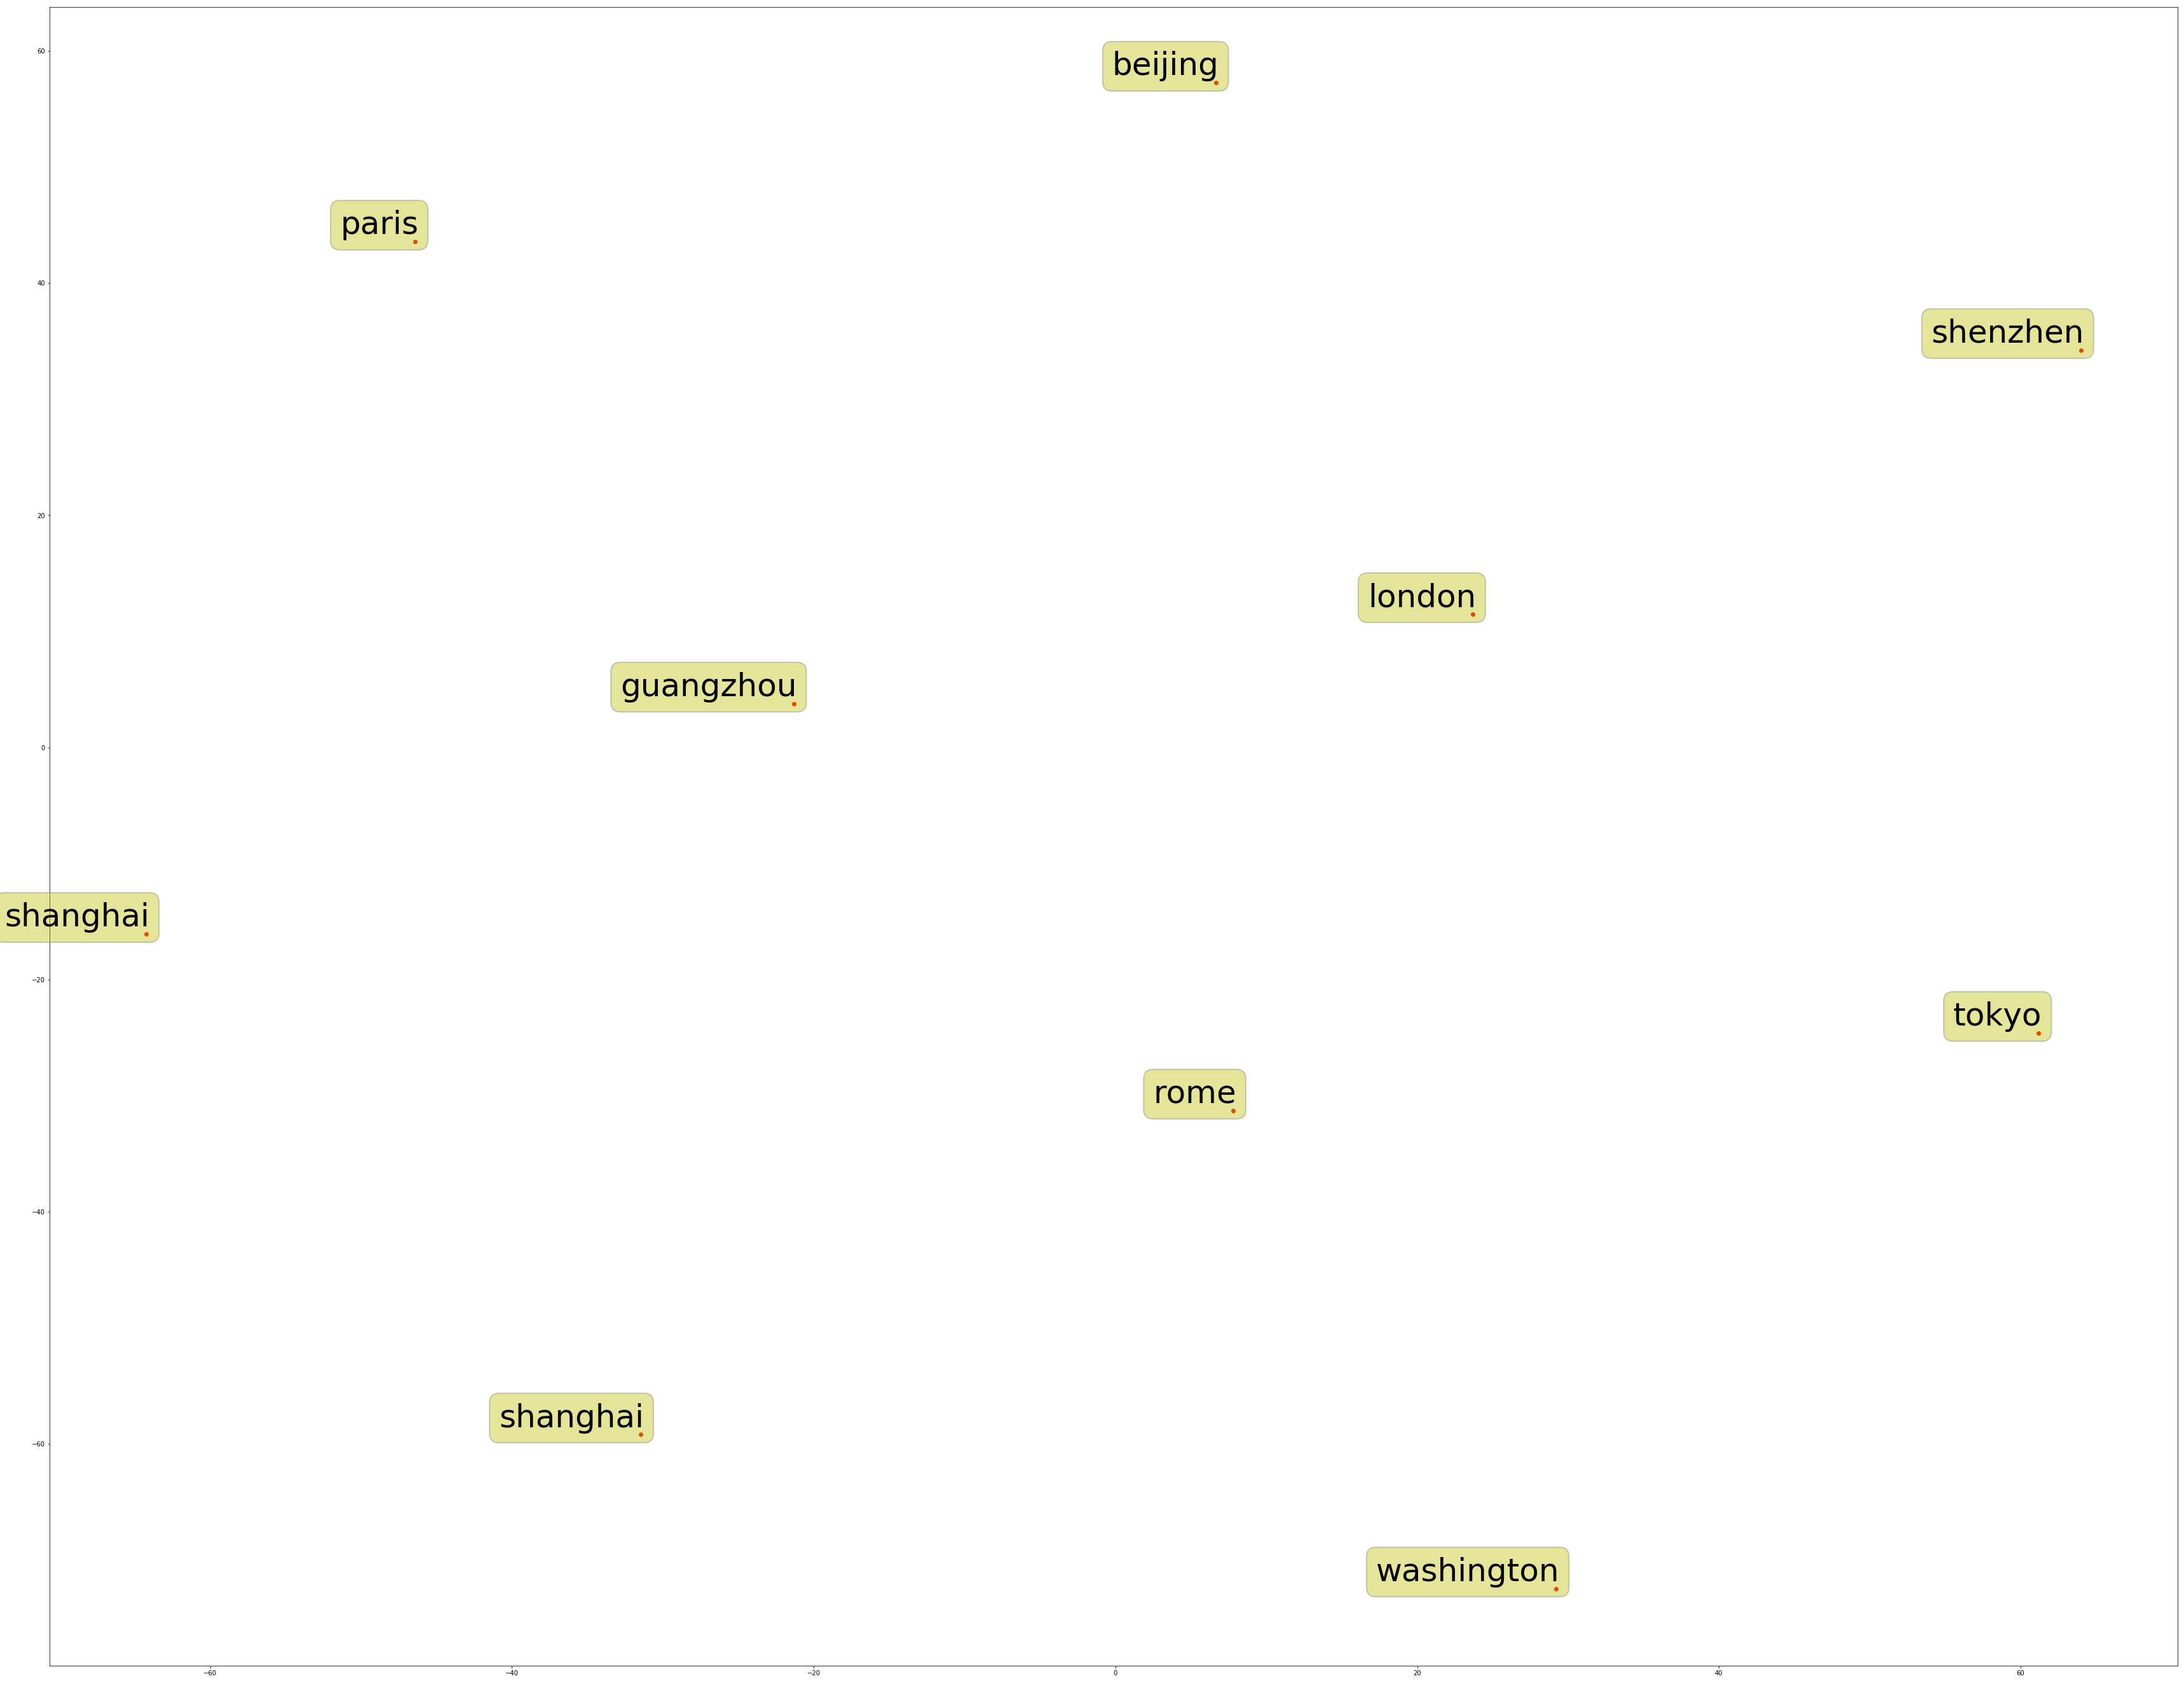

In [54]:
visualize_words(model.wv,words)

# 现成工具

## 词向量查询
- sketch engine https://embeddings.sketchengine.co.uk/

## 词向量可视化

- http://projector.tensorflow.org/
- https://helboukkouri.github.io/embedding-visualization/
- 等等